# Procedures

# 9.4 Introduction to Seaborn

## Categorical data

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

In [9]:
quakes.assign(
                time=lambda x: pd.to_datetime(x.time, unit='ms')
                ).set_index('time').loc['2018-09-28'].query(
                "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
                )


,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


## stripplot()

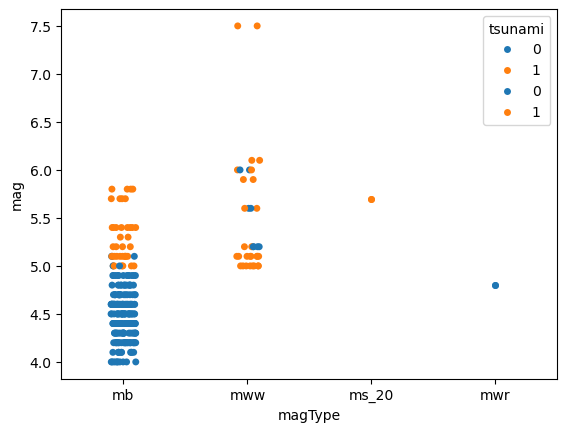

In [15]:
sns.stripplot(
                x='magType',
                y='mag',
                hue='tsunami',
                data=quakes.query('parsed_place == "Indonesia"')
                )
plt.show()

## swarmplot()

C:\Users\Reuel\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Reuel\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


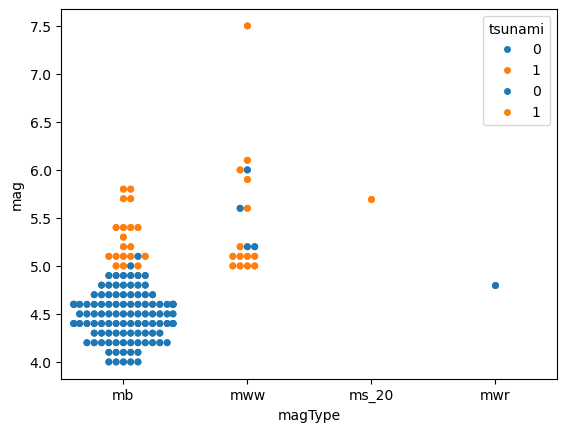

In [20]:
sns.swarmplot(
            x='magType',
            y='mag',
            hue='tsunami',
            data=quakes.query('parsed_place == "Indonesia"')
            )
plt.show()

## Correlations and Heatmaps

### Heatmap()

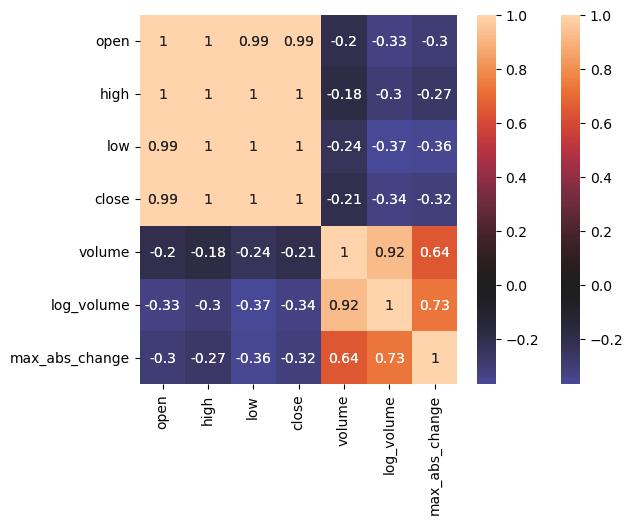

In [28]:
sns.heatmap(
        fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
        ).corr(), annot=True, center=0)
plt.show()

### pairplot()

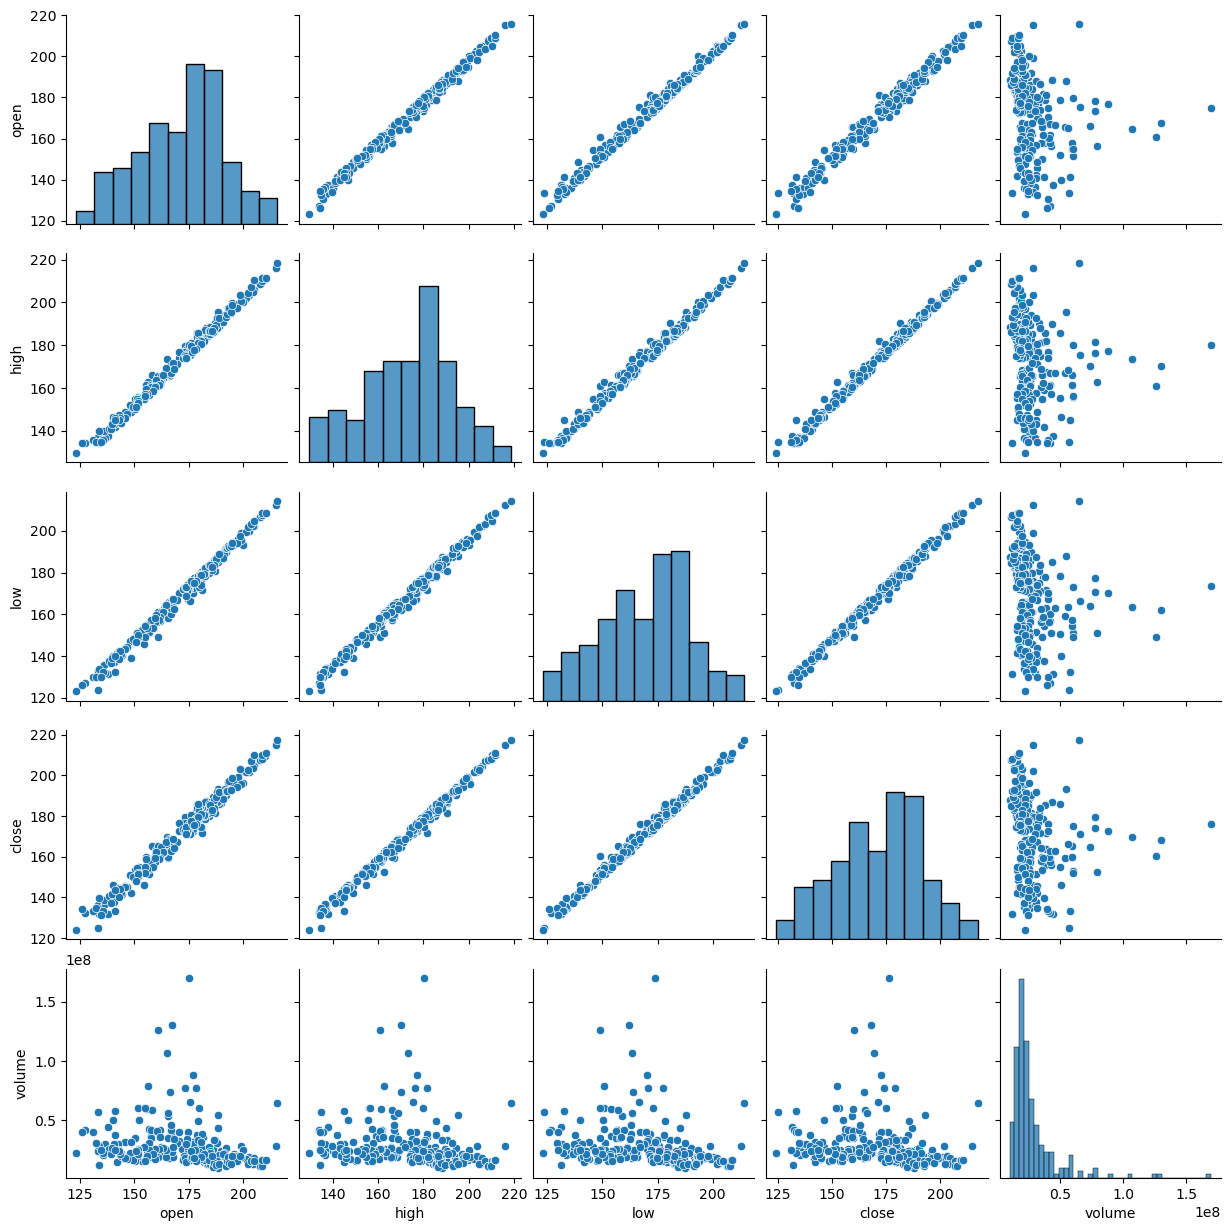

In [41]:
sns.pairplot(fb)
plt.show()

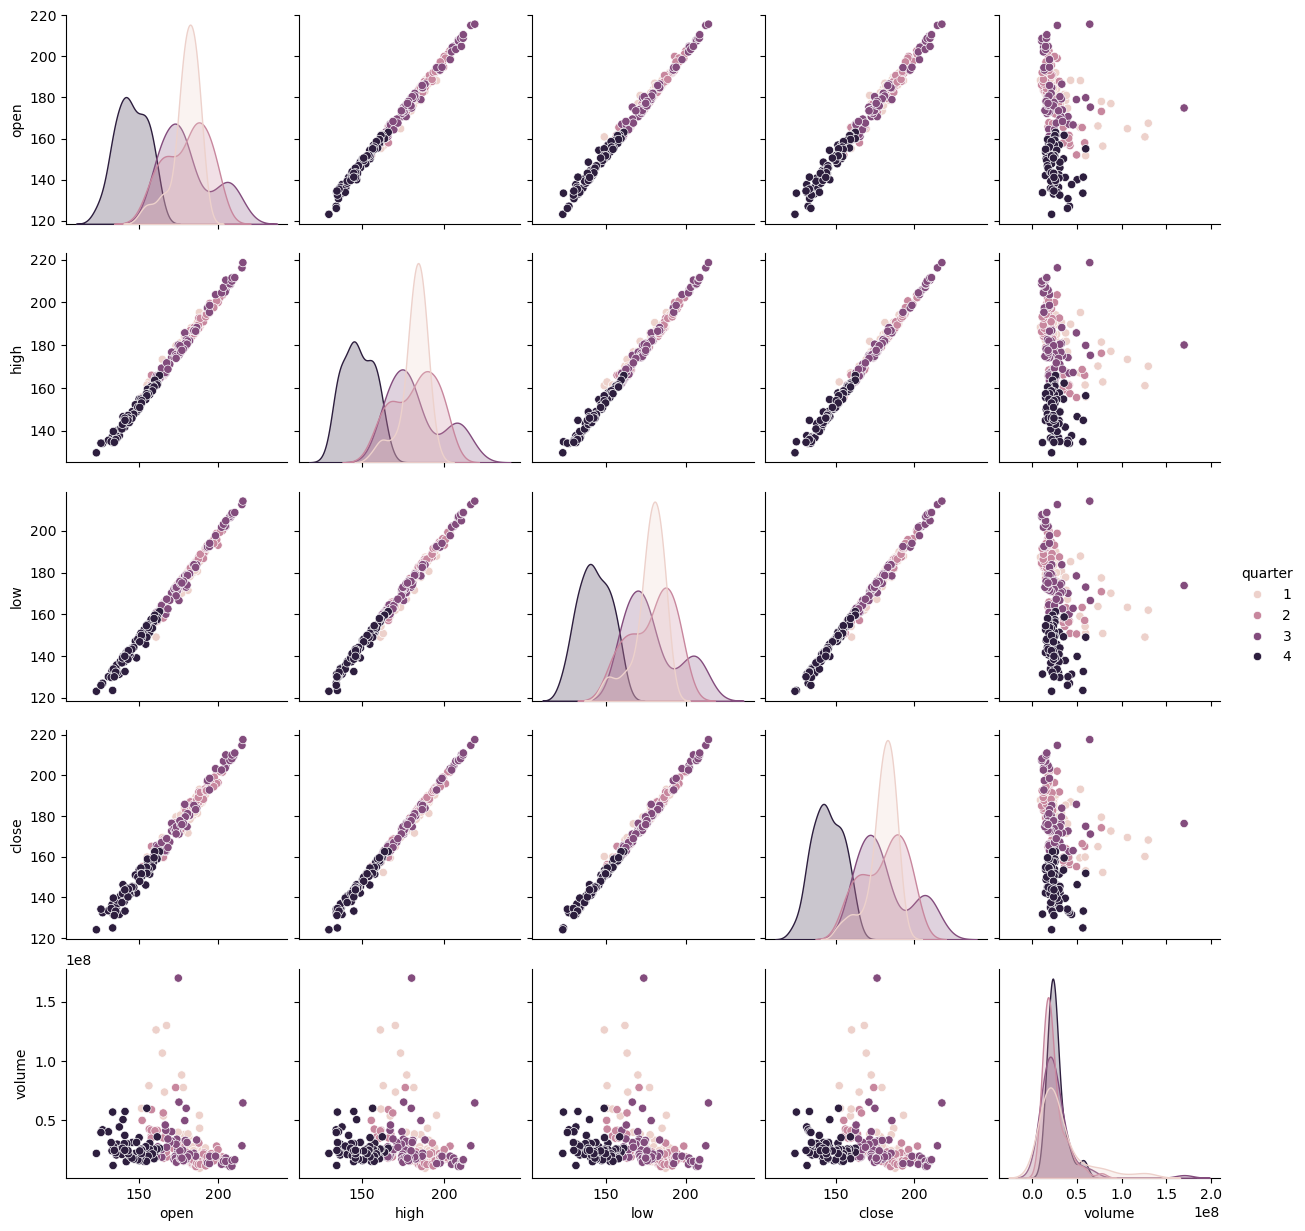

In [38]:
sns.pairplot(
fb.assign(quarter=lambda x: x.index.quarter),
diag_kind='kde',
hue='quarter'
)
plt.show()

### jointplot()

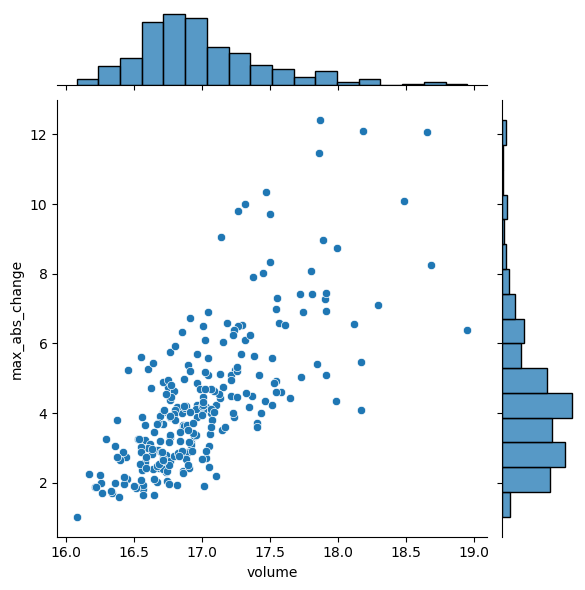

In [48]:
sns.jointplot(
            x='volume',
            y='max_abs_change',
            data=fb.assign(
            volume=np.log(fb.volume),
            max_abs_change=fb.high - fb.low
            )
            )
plt.show()

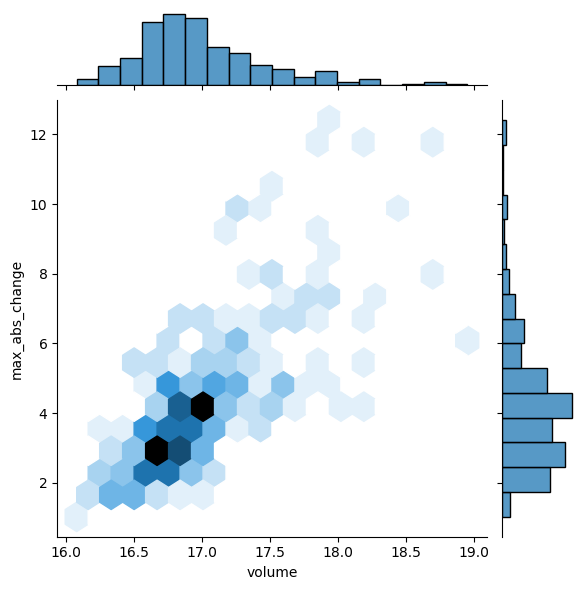

In [54]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='hex',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)
plt.show()

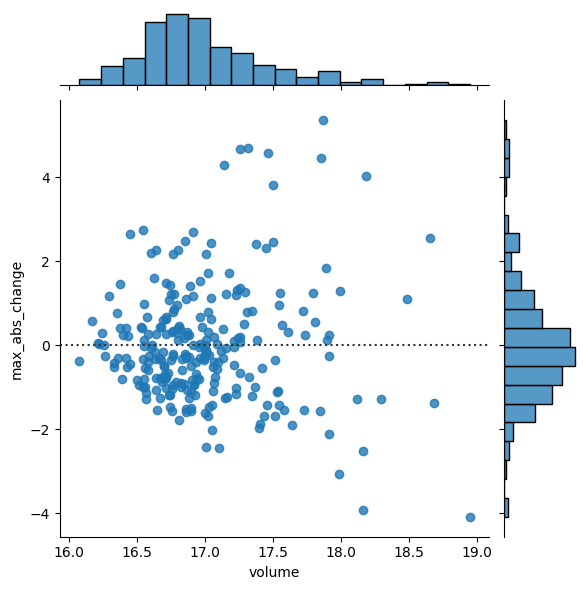

In [60]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='resid',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)
plt.show()

### Regression plots

In [63]:
fb_reg_data = fb.assign(
                        volume=np.log(fb.volume),
                        max_abs_change=fb.high - fb.low
                        ).iloc[:,-2:]


In [69]:
import itertools

iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')

for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [71]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
    print('This prints again because it\'s an iterable:')
    
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


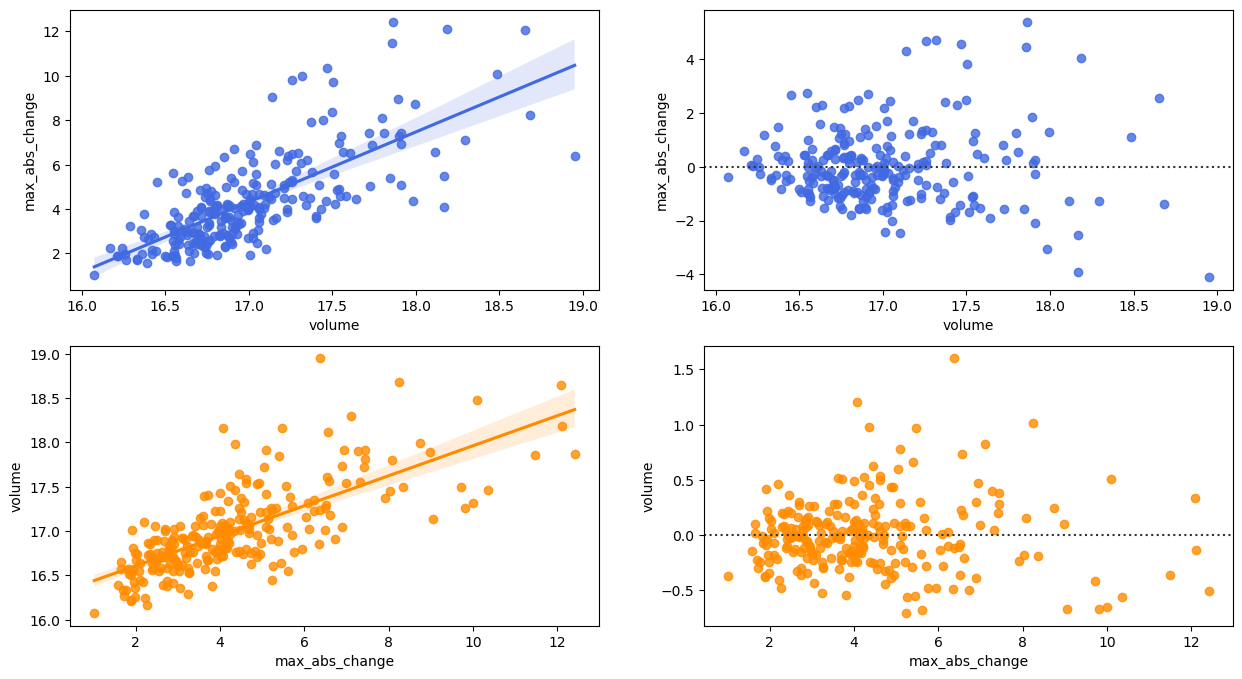

In [73]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)


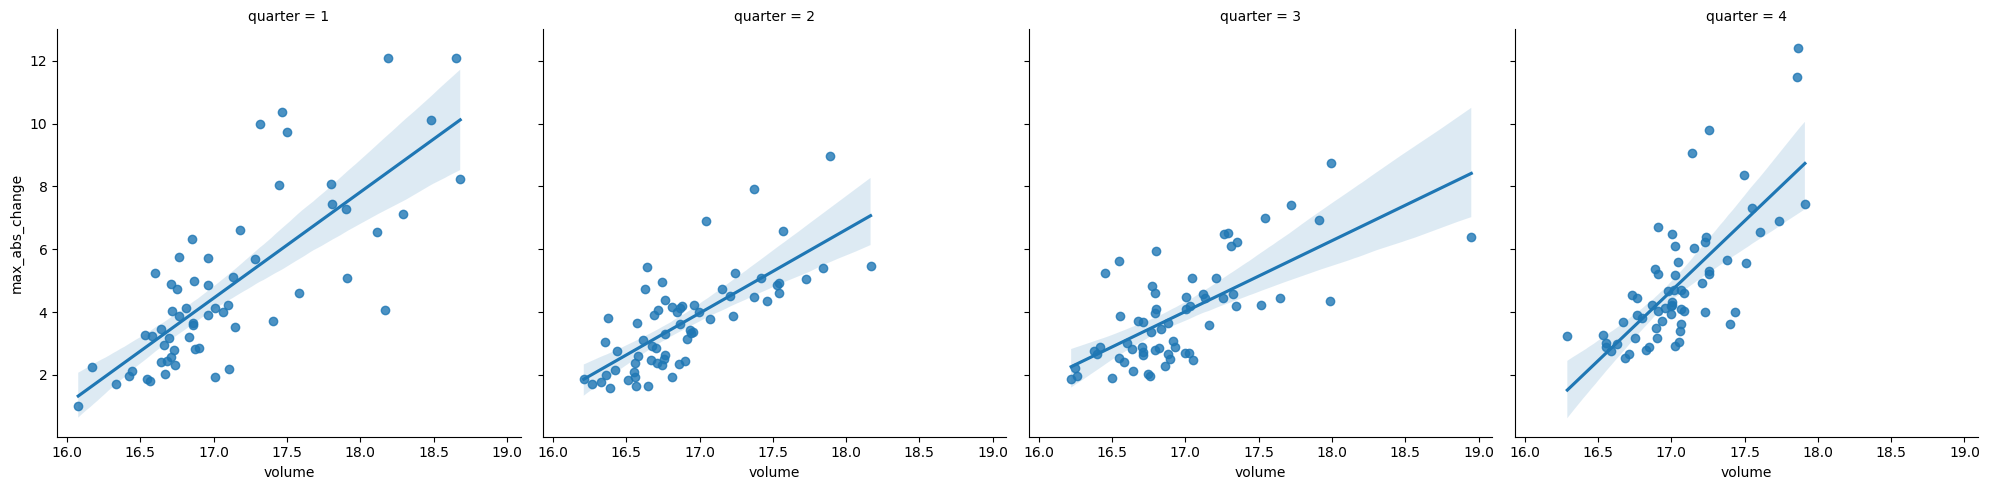

In [79]:
sns.lmplot(
x='volume',
y='max_abs_change',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low,
quarter=lambda x: x.index.quarter
),
col='quarter'
)
plt.show()

## Distributions

### boxenplot()

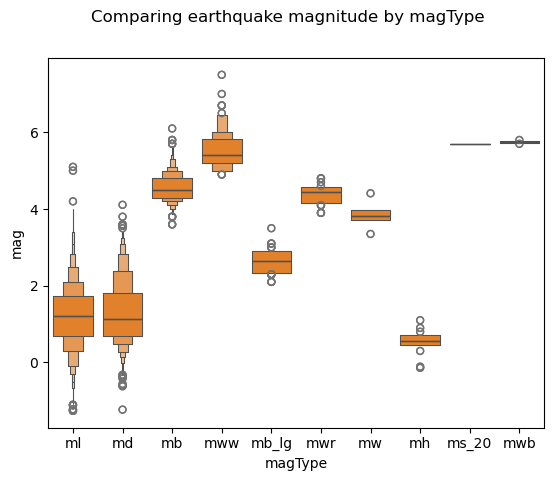

In [85]:
sns.boxenplot(
x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')
plt.show()

### violinplot()

C:\Users\Reuel\AppData\Local\Temp\ipykernel_7712\4086618049.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


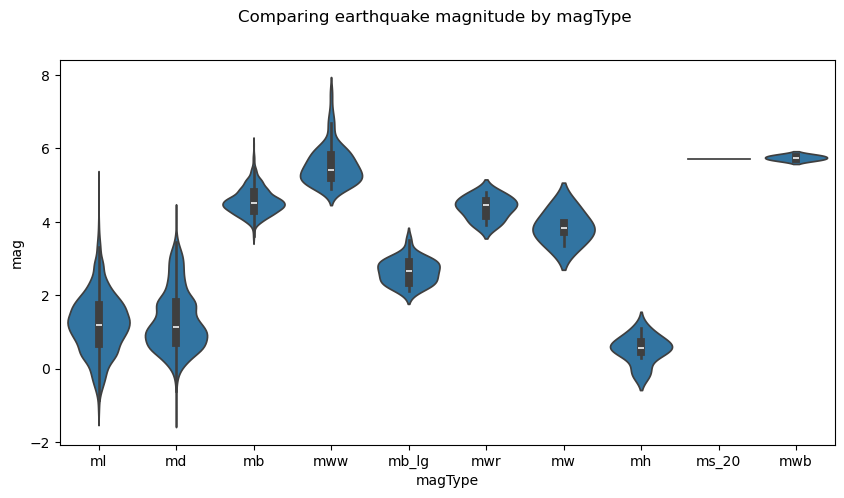

In [92]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
x='magType', y='mag', data=quakes[['magType', 'mag']],
ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')
plt.show()

## Faceting

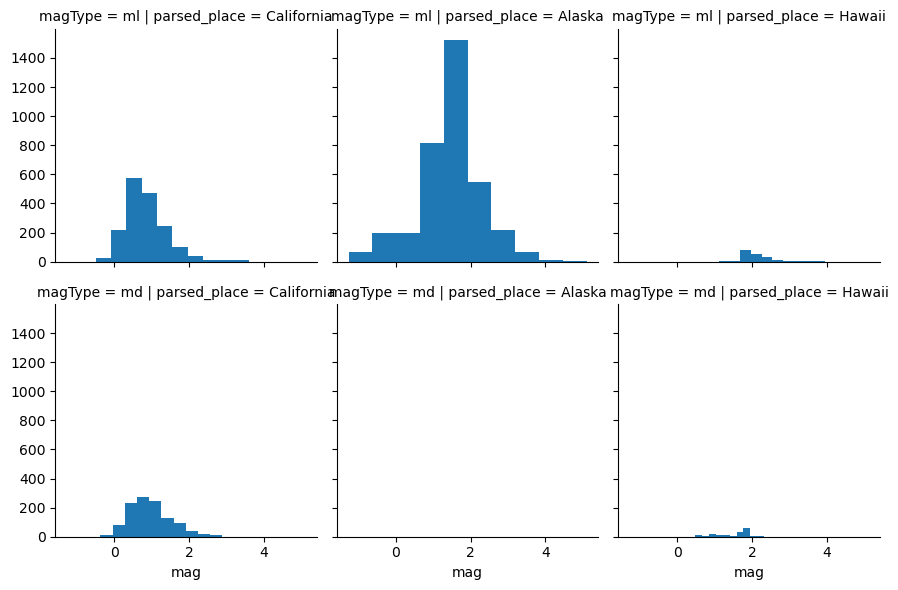

In [99]:
g = sns.FacetGrid(
quakes[
(quakes.parsed_place.isin([
'California', 'Alaska', 'Hawaii'
]))\
& (quakes.magType.isin(['ml', 'md']))
],
row='magType',
col='parsed_place'
)
g = g.map(plt.hist, 'mag')
plt.show()

## 9.5 Formatting Plots

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
                'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
                )

### Titles and Axis Labels

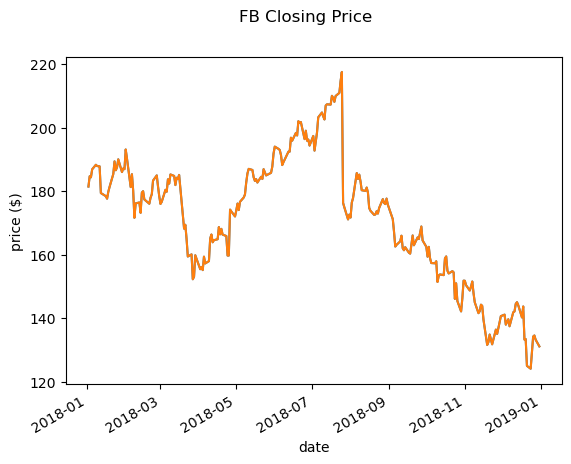

In [108]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')
plt.show()

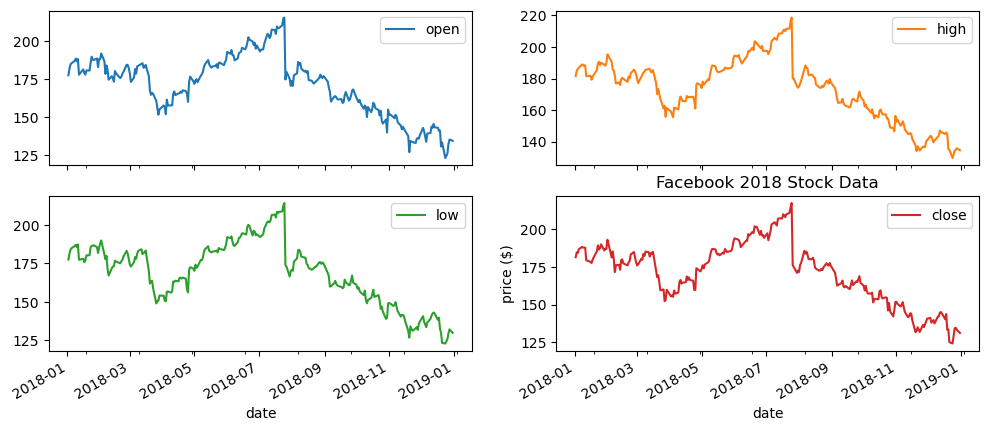

In [114]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')
plt.show()

### Legends

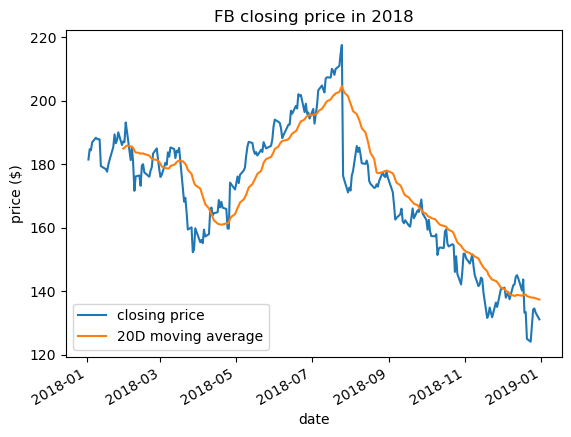

In [121]:
fb.assign(
ma=lambda x: x.close.rolling(20).mean()
).plot(
y=['close', 'ma'],
title='FB closing price in 2018',
label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')
plt.show()

### Formatting Axes

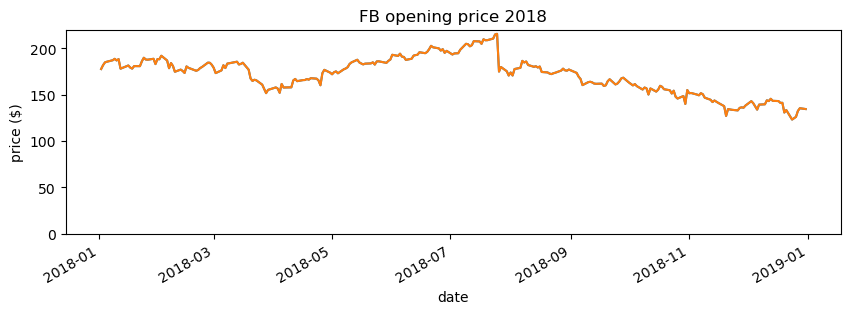

In [126]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')
plt.show()

In [ ]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

plt.show()

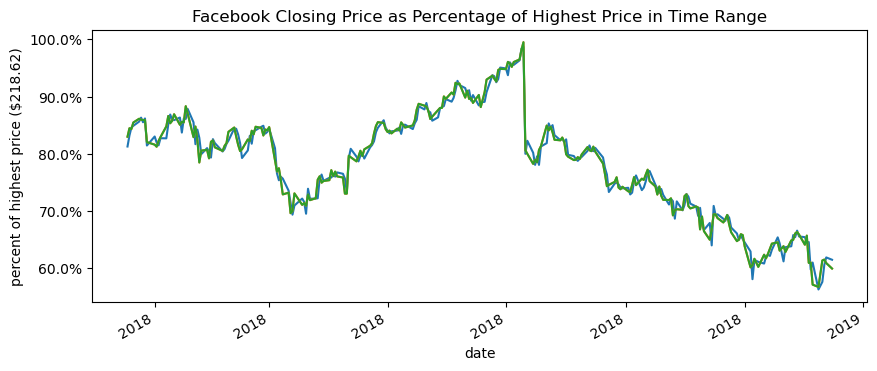

In [132]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
figsize=(10, 4),
title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')
plt.show()

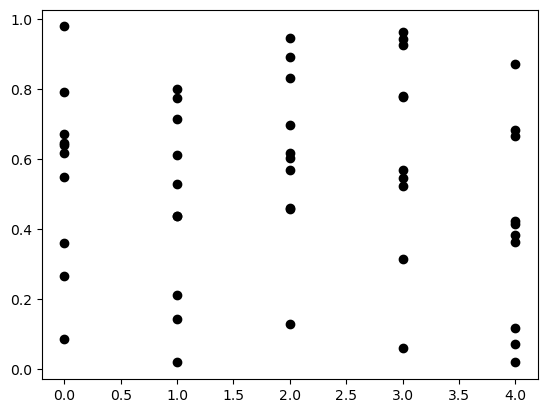

In [139]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
plt.show()

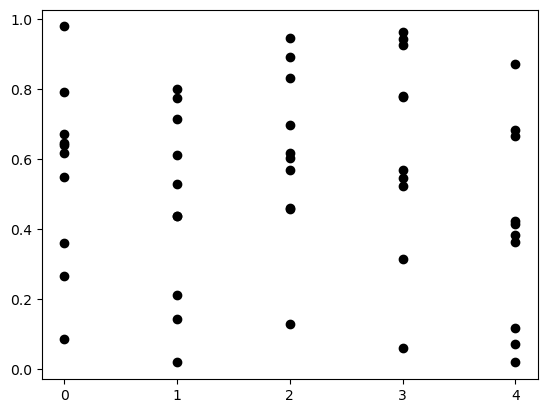

In [145]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
ticker.MultipleLocator(base=1)
)
plt.show()

## 9.6 Customizing Visualizations

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

### Scatter matrix

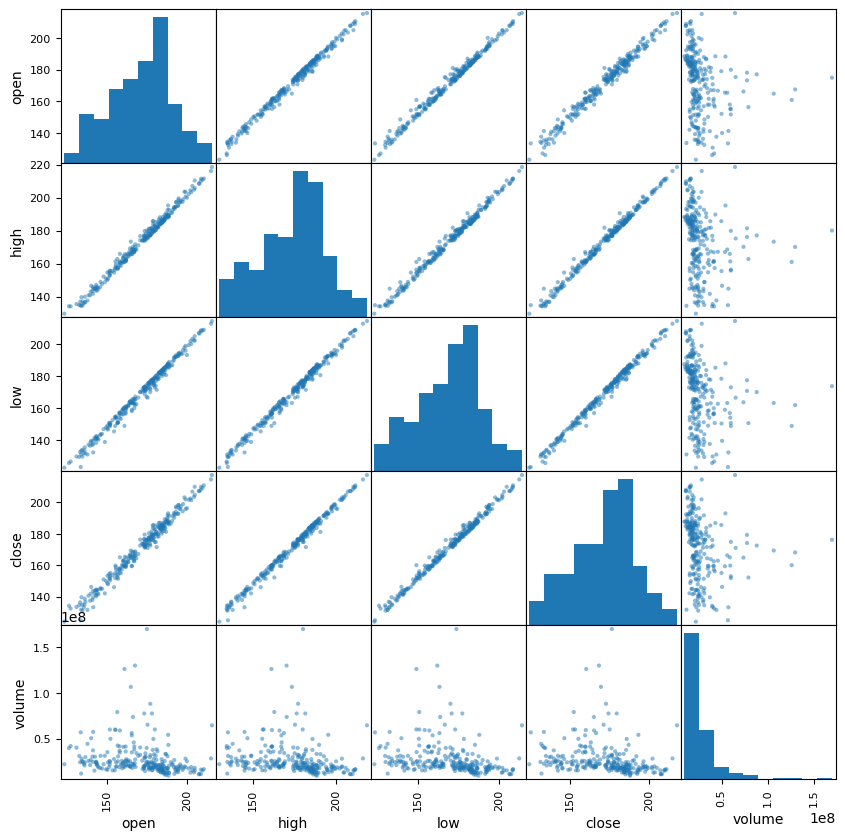

In [155]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))
plt.show()

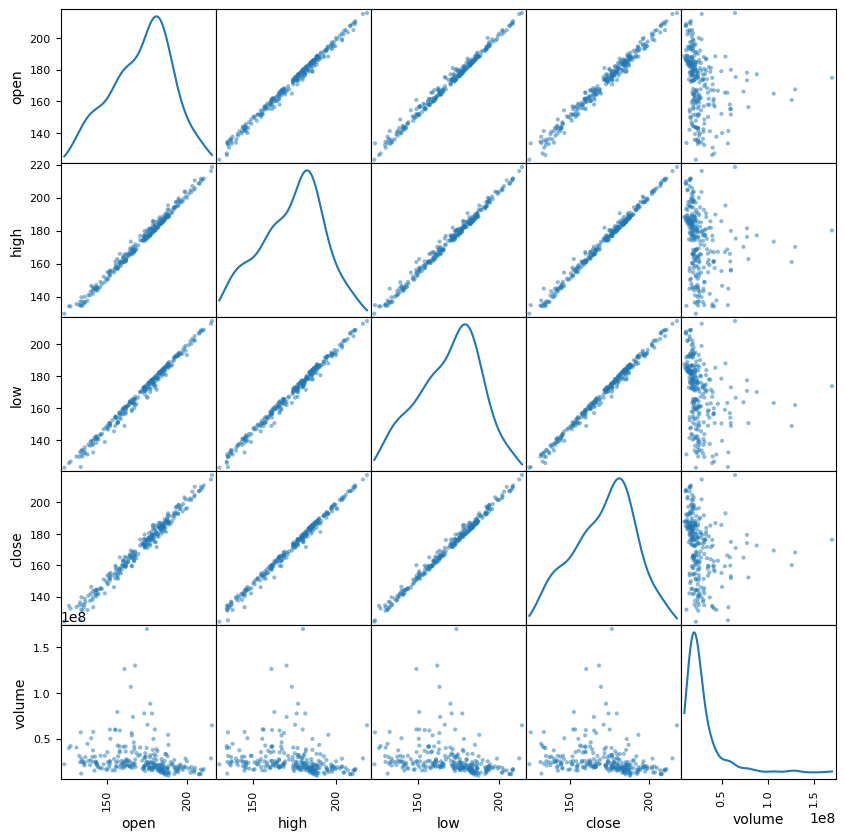

In [161]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')
plt.show()

### Lag Plot

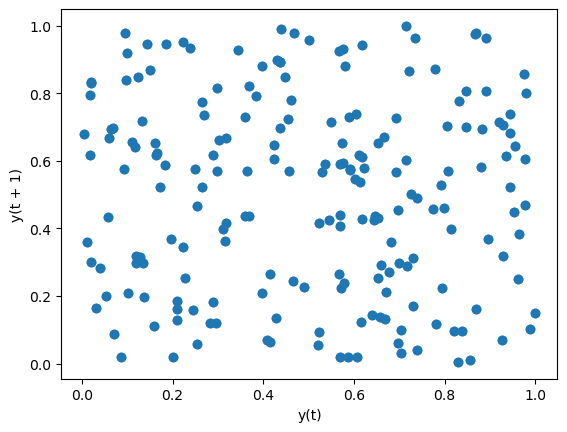

In [167]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))
plt.show()

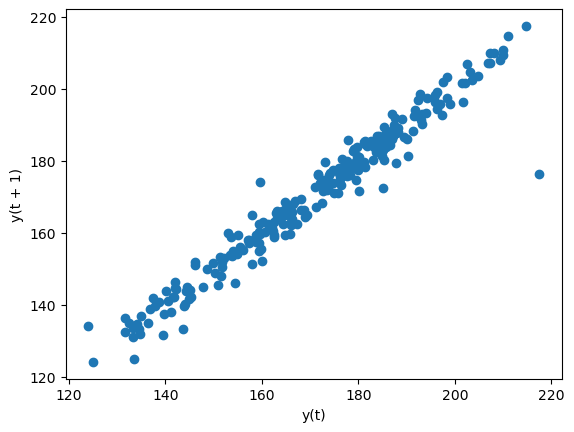

In [169]:
lag_plot(fb.close)
plt.show()

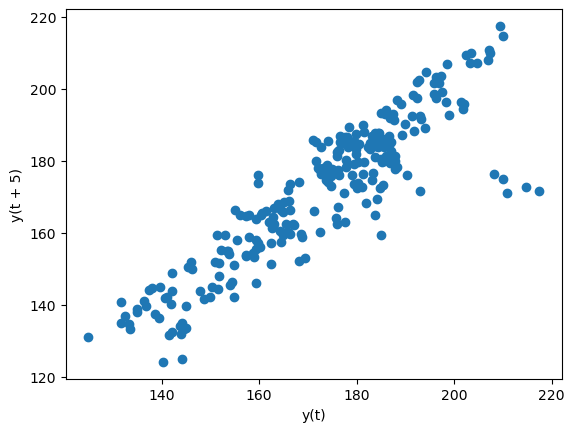

In [171]:
lag_plot(fb.close, lag=5)
plt.show()

### Autocorrelation plots

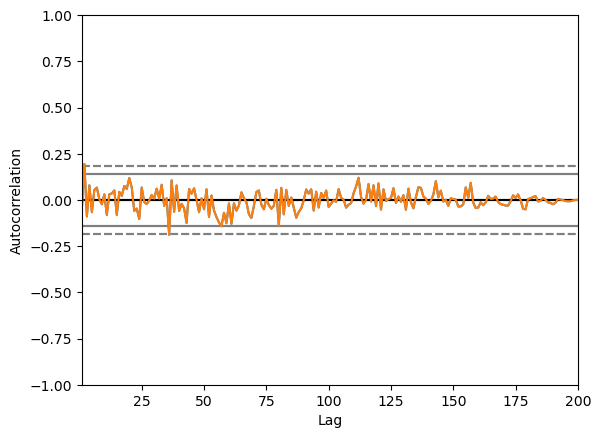

In [176]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))
plt.show()

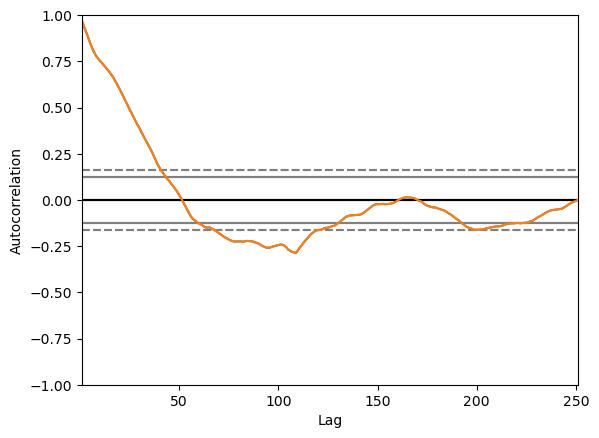

In [180]:
autocorrelation_plot(fb.close)
plt.show()

### Bootstrap plot

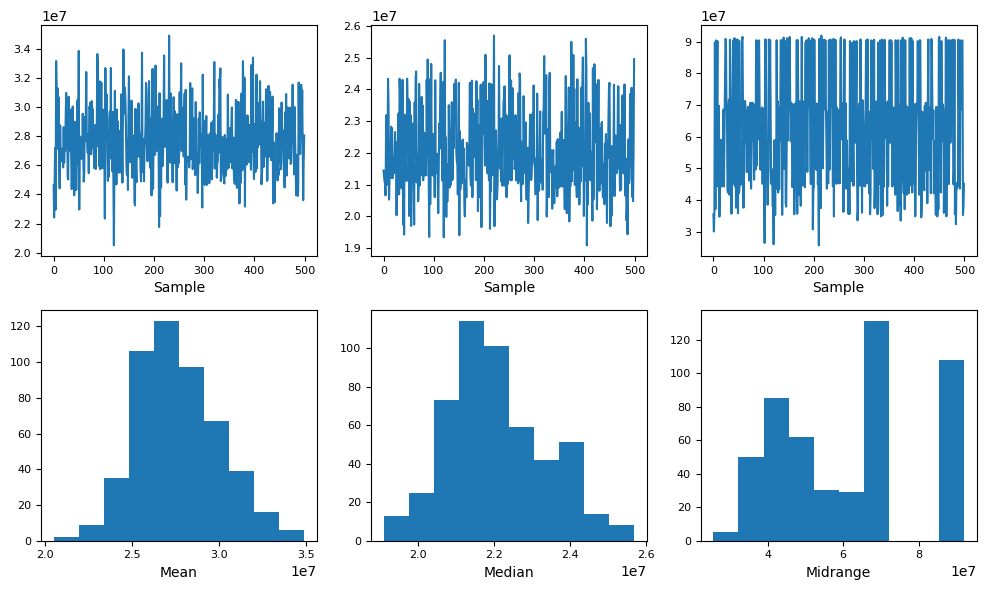

In [183]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))
plt.show()

# Data Analysis

In 9.4, I learned how to do stripplot() and swarmplot() which is identical to a scatter plot. I also learned how to use correlations and Heatmaps in Seaborn. In addition, I learned how to do multiple plots using pairplot(), and jointplot(). There are also a nuance approach to a distribution based plot like boxenpplot() and violinplot(). 
<br>
In 9.5, I learned to format the axes like in matplotlib. In 9.6, I learned how to do the more advance methods of graphing like on the earlier Hands-on-Activity. 9.6 is all about the scatter matrix, Lag plot, Autocorrelation plots, and Bootstrap plot.

# Supplementary

## 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [193]:
eq = pd.read_csv('data/earthquakes-1.csv')
eq.head(3)

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California


In [199]:
eq_heat = eq.query('magType == "mb"') # get all the values with magType mb
eq_heat.head(3)

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
55,4.6,mb,1539453241120,"242km NNW of Farallon de Pajaros, Northern Mar...",0,Northern Mariana Islands


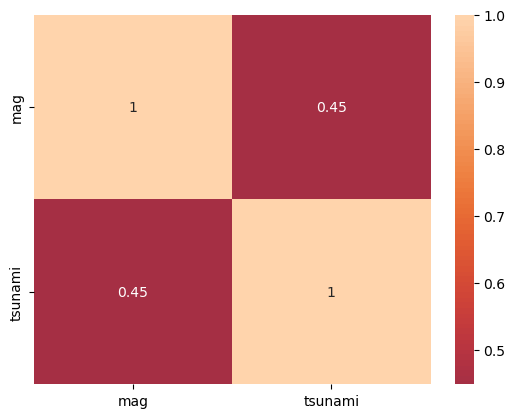

In [213]:
sns.heatmap(
        eq_heat[['mag', 'tsunami']]        # put the sorted dataframe into the heat map
        .corr(), annot=True, center=0)

plt.show()

### 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

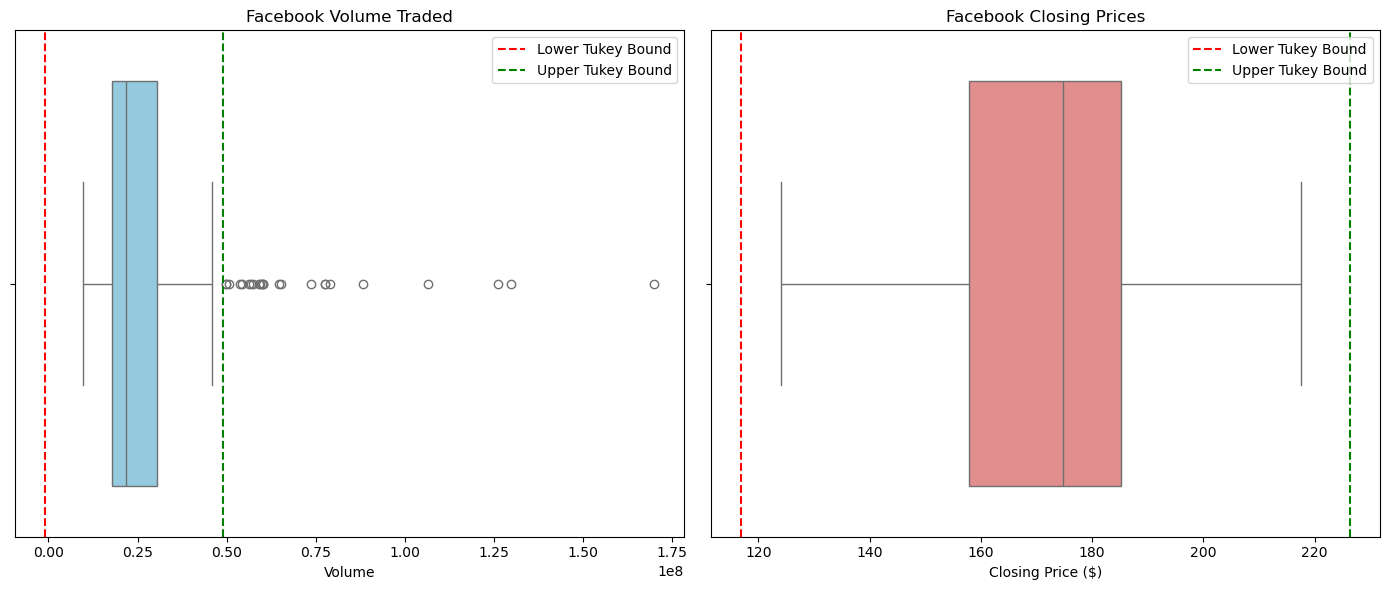

In [227]:
def tukey_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

# --- Calculate bounds ---
vol_lower, vol_upper = tukey_bounds(fb['volume'])
close_lower, close_upper = tukey_bounds(fb['close'])

# --- Set up subplots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Volume boxplot ---
sns.boxplot(x=fb['volume'], ax=ax[0], color='skyblue')
ax[0].axvline(vol_lower, color='red', linestyle='--', label='Lower Tukey Bound')
ax[0].axvline(vol_upper, color='green', linestyle='--', label='Upper Tukey Bound')
ax[0].set_title("Facebook Volume Traded")
ax[0].set_xlabel("Volume")
ax[0].legend()

# --- Close price boxplot ---
sns.boxplot(x=fb['close'], ax=ax[1], color='lightcoral')
ax[1].axvline(close_lower, color='red', linestyle='--', label='Lower Tukey Bound')
ax[1].axvline(close_upper, color='green', linestyle='--', label='Upper Tukey Bound')
ax[1].set_title("Facebook Closing Prices")
ax[1].set_xlabel("Closing Price ($)")
ax[1].legend()

plt.tight_layout()
plt.show()

### 3. Fill in the area between the bounds in the plot from exercise #2.

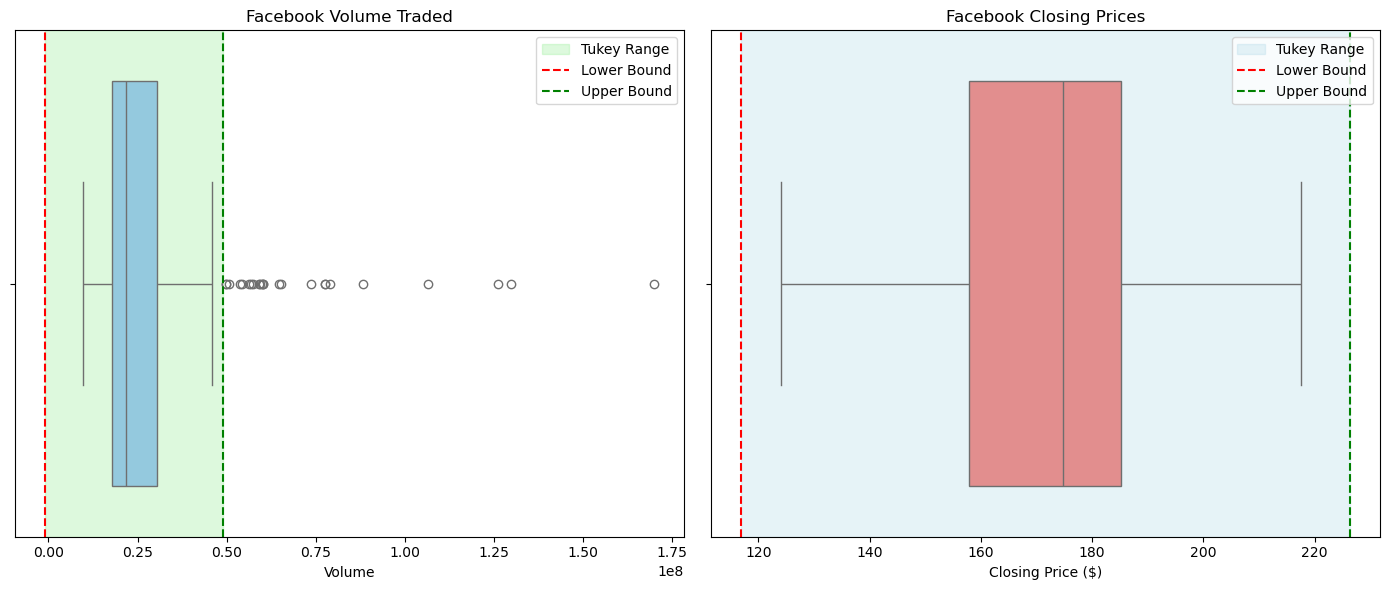

In [229]:
def tukey_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

# --- Calculate bounds ---
vol_lower, vol_upper = tukey_bounds(fb['volume'])
close_lower, close_upper = tukey_bounds(fb['close'])

# --- Subplots ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Volume boxplot with filled Tukey range ---
sns.boxplot(x=fb['volume'], ax=ax[0], color='skyblue')
ax[0].axvspan(vol_lower, vol_upper, color='lightgreen', alpha=0.3, label='Tukey Range')
ax[0].axvline(vol_lower, color='red', linestyle='--', label='Lower Bound')
ax[0].axvline(vol_upper, color='green', linestyle='--', label='Upper Bound')
ax[0].set_title("Facebook Volume Traded")
ax[0].set_xlabel("Volume")
ax[0].legend()

# --- Close price boxplot with filled Tukey range ---
sns.boxplot(x=fb['close'], ax=ax[1], color='lightcoral')
ax[1].axvspan(close_lower, close_upper, color='lightblue', alpha=0.3, label='Tukey Range')
ax[1].axvline(close_lower, color='red', linestyle='--', label='Lower Bound')
ax[1].axvline(close_upper, color='green', linestyle='--', label='Upper Bound')
ax[1].set_title("Facebook Closing Prices")
ax[1].set_xlabel("Closing Price ($)")
ax[1].legend()

plt.tight_layout()
plt.show()

### 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

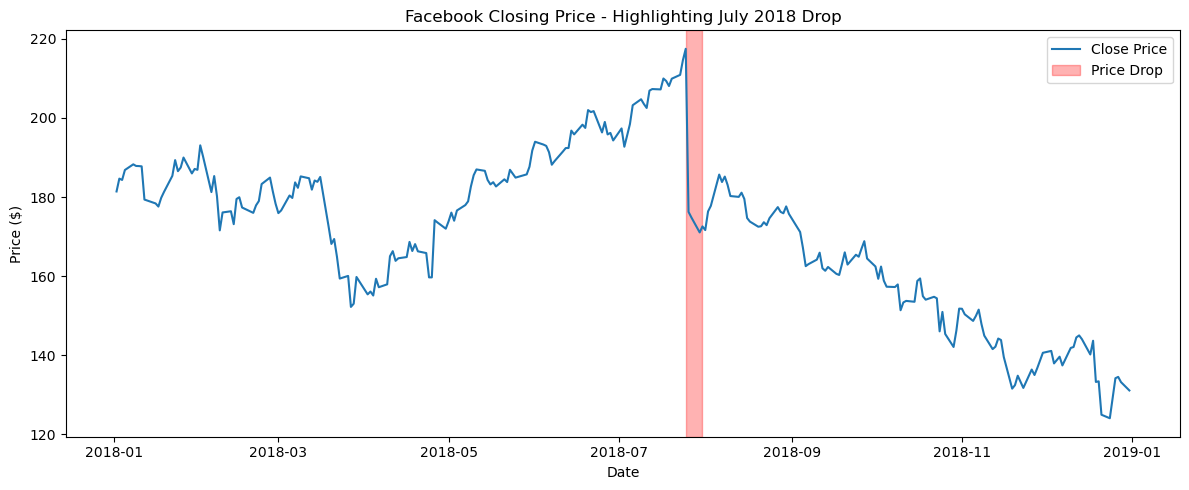

In [233]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot closing price
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(fb.index, fb['close'], label='Close Price')

# Shade the drop period
start = pd.to_datetime('2018-07-25')
end = pd.to_datetime('2018-07-31')
ax.axvspan(start, end, color='red', alpha=0.3, label='Price Drop')

# Labels and legend
ax.set_title('Facebook Closing Price - Highlighting July 2018 Drop')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()

plt.tight_layout()
plt.show()

### 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:

In [ ]:
# did not finish

### 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [ ]:
# did not finish

# Conclusion

In this lab activity, I was able to familiarize the Seaborn Library. It is a more advanced and nuance compared to pandas. Pandas is more general and basic plots. In Seaborn, I was able to use heatmaps, pairplots, jointplots, etc which are a bit harder to understand and use at first. Overall, I was able to learn some things in Seaborn but there are plenty of things I was not able to understand due to the complexity and amount of the informations in Seaborn.